# **German Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

ger_ds_path = '../../datasets/UCI/German/german.data'
ger_prep_ds_path = '../../datasets/preprocessed/ger/'

(CVXPY) May 21 06:44:55 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 21 06:44:55 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(ger_prep_ds_path)

In [3]:
data = utilities.read_csv(ger_ds_path, sep=' ', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


#### Fix column names formatting.

In [5]:
data.columns = ['A{}'.format(i) for i in range(1, 22)]

In [6]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      1000 non-null   object
 1   A2      1000 non-null   int64 
 2   A3      1000 non-null   object
 3   A4      1000 non-null   object
 4   A5      1000 non-null   int64 
 5   A6      1000 non-null   object
 6   A7      1000 non-null   object
 7   A8      1000 non-null   int64 
 8   A9      1000 non-null   object
 9   A10     1000 non-null   object
 10  A11     1000 non-null   int64 
 11  A12     1000 non-null   object
 12  A13     1000 non-null   int64 
 13  A14     1000 non-null   object
 14  A15     1000 non-null   object
 15  A16     1000 non-null   int64 
 16  A17     1000 non-null   object
 17  A18     1000 non-null   int64 
 18  A19     1000 non-null   object
 19  A20     1000 non-null   object
 20  A21     1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


#### Fix column dtypes.

In [8]:
data['A1'] = data['A1'].astype('category')
data['A2'] = data['A2'].astype('float64')
data['A3'] = data['A3'].astype('category')
data['A4'] = data['A4'].astype('category')
data['A5'] = data['A5'].astype('float64')
data['A6'] = data['A6'].astype('category')
data['A7'] = data['A7'].astype('category')
data['A8'] = data['A8'].astype('float64')
data['A9'] = data['A9'].astype('category')
data['A10'] = data['A10'].astype('category')
data['A11'] = data['A11'].astype('float64')
data['A12'] = data['A12'].astype('category')
data['A13'] = data['A13'].astype('float64')
data['A14'] = data['A14'].astype('category')
data['A15'] = data['A15'].astype('category')
data['A16'] = data['A16'].astype('float64')
data['A17'] = data['A17'].astype('category')
data['A18'] = data['A18'].astype('int64')
data['A19'] = data['A19'].astype('category')
data['A20'] = data['A20'].astype('category')
data['defaulted'] = data['A21'] == 2

#### Check column names are consistent with what reported at: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [9]:
utilities.print_unique_values(data)

Unique values for A1: ['A11', 'A12', 'A14', 'A13']
Unique values for A2: [6.0, 48.0, 12.0, 42.0, 24.0, 36.0, 30.0, 15.0, 9.0, 10.0, 7.0, 60.0, 18.0, 45.0, 11.0, 27.0, 8.0, 54.0, 20.0, 14.0, 33.0, 21.0, 16.0, 4.0, 47.0, 13.0, 22.0, 39.0, 28.0, 5.0, 26.0, 72.0, 40.0]
Unique values for A3: ['A34', 'A32', 'A33', 'A30', 'A31']
Unique values for A4: ['A43', 'A46', 'A42', 'A40', 'A41', 'A49', 'A44', 'A45', 'A410', 'A48']
Unique values for A5: [1169.0, 5951.0, 2096.0, 7882.0, 4870.0, 9055.0, 2835.0, 6948.0, 3059.0, 5234.0, 1295.0, 4308.0, 1567.0, 1199.0, 1403.0, 1282.0, 2424.0, 8072.0, 12579.0, 3430.0, 2134.0, 2647.0, 2241.0, 1804.0, 2069.0, 1374.0, 426.0, 409.0, 2415.0, 6836.0, 1913.0, 4020.0, 5866.0, 1264.0, 1474.0, 4746.0, 6110.0, 2100.0, 1225.0, 458.0, 2333.0, 1158.0, 6204.0, 6187.0, 6143.0, 1393.0, 2299.0, 1352.0, 7228.0, 2073.0, 5965.0, 1262.0, 3378.0, 2225.0, 783.0, 6468.0, 9566.0, 1961.0, 6229.0, 1391.0, 1537.0, 1953.0, 14421.0, 3181.0, 5190.0, 2171.0, 1007.0, 1819.0, 2394.0, 8133.0, 7

#### Drop original label column.

In [10]:
data.drop(['A21'], axis=1, inplace=True)

#### Plot features data types.

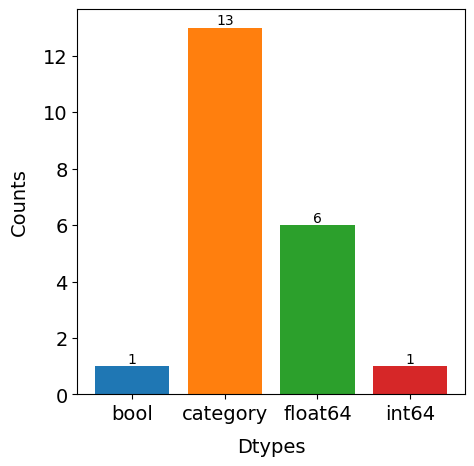

In [11]:
plotting.plot_dtypes_hist(data, '', 'Dtypes', 'Counts',
                          save_path=ger_prep_ds_path + 'dtypes.pdf')

#### Data cleaning.

In [12]:
before_data_cleaning_count = len(data)

#### Rename features labels to have more meaningful names.

In [13]:
data.rename(columns={'A1':'exist-check-acc-status',
                     'A2':'duration',
                     'A3':'credit-history',
                     'A4':'purpose',
                     'A5':'credit-amount',
                     'A6':'sav-acc',
                     'A7':'employment-years',
                     'A8':'install-rate',
                     'A9':'marriage-sex',
                     'A10':'guarantor',
                     'A11':'residency-dur',
                     'A12':'property',
                     'A13':'age',
                     'A14':'other-install-plans',
                     'A15':'housing',
                     'A16':'existing-credits',
                     'A17':'job',
                     'A18':'dependents',
                     'A19':'phone-provided',
                     'A20':'foreign-worker'}, inplace=True)

#### Plot class distribution.

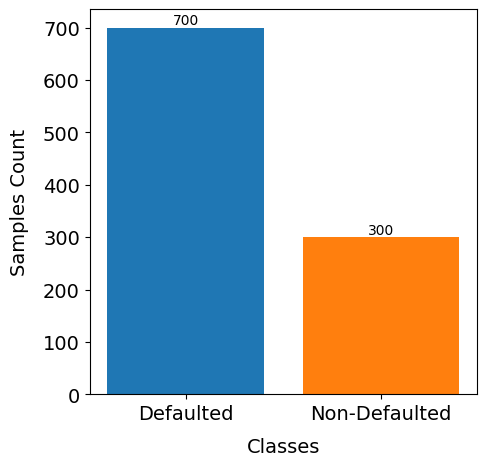

In [14]:
labels = ['Defaulted', 'Non-Defaulted']
values = data.defaulted.value_counts().values
plotting.plot_hist(labels, values, '', 'Classes', 'Samples Count',
                   save_path=ger_prep_ds_path + 'class-distribution.pdf')

#### Plot missing values histogram.

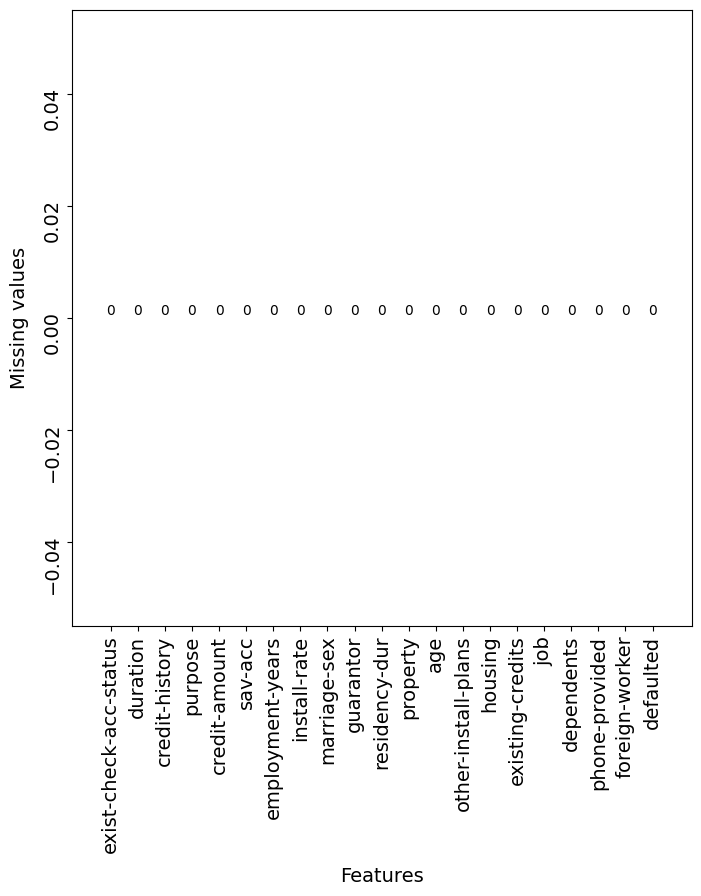

In [15]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(8,8),
                   rotated_ticks=True, save_path=ger_prep_ds_path + 'missing-values-1.pdf')

In [16]:
data['foreign-worker'].value_counts()

foreign-worker
A201    963
A202     37
Name: count, dtype: int64

#### Apply optimal binnin and WoE.

In [17]:
data, features_scores = preprocessing.optbinning_woe(data=data, solver="cp",
                                                     outlier_detector="range",
                                                     save_path=ger_prep_ds_path,
                                                     verbose=True)

  0%|                                                                                                                                                                 | 0/21 [00:00<?, ?it/s]

Processing feature: exist-check-acc-status.
2023-05-21 18:44:56,732 | INFO : Optimal binning started.
2023-05-21 18:44:56,732 | INFO : Options: check parameters.
2023-05-21 18:44:56,733 | INFO : Pre-processing started.
2023-05-21 18:44:56,733 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:56,734 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:56,734 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:56,735 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:56,735 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:56,735 | INFO : Pre-processing: number of others samples: 0
2023-05-21 18:44:56,735 | INFO : Pre-processing: number of categories: 4
2023-05-21 18:44:56,735 | INFO : Pre-processing: number of categories others: 0
2023-05-21 18:44:56,736 | INFO : Pre-processing terminated. Time: 0.0013s
2023-05-21 18:44:56,736 | INFO : Pre-binning started.
2023-05-21 18:44:56,737 | INFO : Pre-

  5%|███████▎                                                                                                                                                 | 1/21 [00:00<00:02,  7.53it/s]

Solver status for feature exist-check-acc-status: OPTIMAL
0           [A14]
1           [A13]
2           [A12]
3           [A11]
4         Special
5         Missing
Totals           
Name: Bin, dtype: object
exist-check-acc-status
 1.176263    394
-0.818099    274
-0.401392    269
 0.405465     63
Name: count, dtype: int64
Processing feature: duration.
2023-05-21 18:44:56,865 | INFO : Optimal binning started.
2023-05-21 18:44:56,865 | INFO : Options: check parameters.
2023-05-21 18:44:56,866 | INFO : Pre-processing started.
2023-05-21 18:44:56,866 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:56,867 | INFO : Pre-processing: number of clean samples: 930
2023-05-21 18:44:56,867 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:56,867 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:56,867 | INFO : Pre-processing: number of outlier samples: 70
2023-05-21 18:44:56,868 | INFO : Pre-processing terminated. Time: 0.0004s
2023-05-2

 10%|██████████████▌                                                                                                                                          | 2/21 [00:00<00:02,  7.29it/s]

Solver status for feature duration: OPTIMAL
0           (-inf, 8.50)
1          [8.50, 11.50)
2         [11.50, 15.50)
3         [15.50, 26.50)
4         [26.50, 34.50)
5           [34.50, inf)
6                Special
7                Missing
Totals                  
Name: Bin, dtype: object
duration
-0.195526    340
 0.168017    251
-0.623823    170
 1.181636     94
 0.454297     86
-0.278767     59
Name: count, dtype: int64
Processing feature: credit-history.
2023-05-21 18:44:57,005 | INFO : Optimal binning started.
2023-05-21 18:44:57,006 | INFO : Options: check parameters.
2023-05-21 18:44:57,006 | INFO : Pre-processing started.
2023-05-21 18:44:57,006 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:57,008 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:57,009 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:57,009 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:57,009 | INFO : Pre-processing: n

 14%|█████████████████████▊                                                                                                                                   | 3/21 [00:00<00:02,  7.50it/s]

Solver status for feature credit-history: OPTIMAL
0              [A34]
1              [A33]
2              [A32]
3         [A31, A30]
4            Special
5            Missing
Totals              
Name: Bin, dtype: object
credit-history
-0.088319    530
 0.733741    293
-1.234071     89
-0.085158     88
Name: count, dtype: int64
Processing feature: purpose.
2023-05-21 18:44:57,134 | INFO : Optimal binning started.
2023-05-21 18:44:57,135 | INFO : Options: check parameters.
2023-05-21 18:44:57,135 | INFO : Pre-processing started.
2023-05-21 18:44:57,135 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:57,137 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:57,137 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:57,138 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:57,138 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:57,138 | INFO : Pre-processing: number of others samples: 0
20

 19%|█████████████████████████████▏                                                                                                                           | 4/21 [00:00<00:02,  7.45it/s]

Solver status for feature purpose: OPTIMAL
0          [A48, A41]
1               [A43]
2          [A42, A44]
3               [A49]
4          [A45, A40]
5         [A410, A46]
6             Special
7             Missing
Totals               
Name: Bin, dtype: object
purpose
 0.410063    280
-0.353105    256
-0.099235    193
 0.805625    112
-0.230524     97
-0.587787     62
Name: count, dtype: int64
Processing feature: credit-amount.
2023-05-21 18:44:57,270 | INFO : Optimal binning started.
2023-05-21 18:44:57,270 | INFO : Options: check parameters.
2023-05-21 18:44:57,270 | INFO : Pre-processing started.
2023-05-21 18:44:57,271 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:57,271 | INFO : Pre-processing: number of clean samples: 928
2023-05-21 18:44:57,272 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:57,272 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:57,272 | INFO : Pre-processing: number of outlier samples: 72
20

 24%|████████████████████████████████████▍                                                                                                                    | 5/21 [00:00<00:02,  5.87it/s]

Solver status for feature credit-amount: OPTIMAL
0             (-inf, 954.50)
1          [954.50, 1373.00)
2         [1373.00, 3446.50)
3         [3446.50, 3913.50)
4         [3913.50, 6322.50)
5             [6322.50, inf)
6                    Special
7                    Missing
Totals                      
Name: Bin, dtype: object
credit-amount
 0.194992    427
-0.129812    146
-0.505406    133
-0.440023    127
-0.216952    107
 1.459626     60
Name: count, dtype: int64
Processing feature: sav-acc.
2023-05-21 18:44:57,505 | INFO : Optimal binning started.
2023-05-21 18:44:57,505 | INFO : Options: check parameters.
2023-05-21 18:44:57,505 | INFO : Pre-processing started.
2023-05-21 18:44:57,505 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:57,507 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:57,507 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:57,507 | INFO : Pre-processing: number of special samples: 0
2023-05-21 

 29%|███████████████████████████████████████████▋                                                                                                             | 6/21 [00:00<00:02,  6.49it/s]

Solver status for feature sav-acc: OPTIMAL
0         [A64, A63]
1              [A65]
2              [A62]
3              [A61]
4            Special
5            Missing
Totals              
Name: Bin, dtype: object
sav-acc
-0.271358    603
 0.704246    183
 0.862784    111
-0.139552    103
Name: count, dtype: int64
Processing feature: employment-years.
2023-05-21 18:44:57,626 | INFO : Optimal binning started.
2023-05-21 18:44:57,627 | INFO : Options: check parameters.
2023-05-21 18:44:57,627 | INFO : Pre-processing started.
2023-05-21 18:44:57,627 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:57,629 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:57,629 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:57,629 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:57,630 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:57,630 | INFO : Pre-processing: number of others samples: 0
2023-05

 33%|███████████████████████████████████████████████████                                                                                                      | 7/21 [00:01<00:02,  6.89it/s]

Solver status for feature employment-years: OPTIMAL
0           [A74]
1           [A75]
2           [A73]
3           [A71]
4           [A72]
5         Special
6         Missing
Totals           
Name: Bin, dtype: object
employment-years
-0.032103    339
 0.235566    253
 0.394415    174
-0.470820    172
-0.319230     62
Name: count, dtype: int64
Processing feature: install-rate.
2023-05-21 18:44:57,753 | INFO : Optimal binning started.
2023-05-21 18:44:57,753 | INFO : Options: check parameters.
2023-05-21 18:44:57,754 | INFO : Pre-processing started.
2023-05-21 18:44:57,754 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:57,755 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:57,755 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:57,755 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:57,755 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:57,756 | INFO : Pre-processing terminat

 38%|██████████████████████████████████████████████████████████▎                                                                                              | 8/21 [00:01<00:01,  7.25it/s]

Solver status for feature install-rate: OPTIMAL
0         (-inf, 1.50)
1         [1.50, 2.50)
2         [2.50, 3.50)
3          [3.50, inf)
4              Special
5              Missing
Totals                
Name: Bin, dtype: object
install-rate
-0.157300    476
 0.155466    231
 0.064539    157
 0.251314    136
Name: count, dtype: int64
Processing feature: marriage-sex.
2023-05-21 18:44:57,876 | INFO : Optimal binning started.
2023-05-21 18:44:57,876 | INFO : Options: check parameters.
2023-05-21 18:44:57,876 | INFO : Pre-processing started.
2023-05-21 18:44:57,877 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:57,878 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:57,878 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:57,879 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:57,879 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:57,879 | INFO : Pre-processing: number of other

 43%|█████████████████████████████████████████████████████████████████▌                                                                                       | 9/21 [00:01<00:01,  6.50it/s]

Solver status for feature marriage-sex: OPTIMAL
0           [A93]
1           [A94]
2           [A92]
3           [A91]
4         Special
5         Missing
Totals           
Name: Bin, dtype: object
marriage-sex
 0.165548    548
-0.235341    310
 0.138519     92
-0.441833     50
Name: count, dtype: int64
Processing feature: guarantor.
2023-05-21 18:44:58,064 | INFO : Optimal binning started.
2023-05-21 18:44:58,065 | INFO : Options: check parameters.
2023-05-21 18:44:58,065 | INFO : Pre-processing started.
2023-05-21 18:44:58,065 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:58,067 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:58,067 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:58,067 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:58,067 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:58,068 | INFO : Pre-processing: number of others samples: 0
2023-05-21 18:44:58,068 |

 48%|████████████████████████████████████████████████████████████████████████▍                                                                               | 10/21 [00:01<00:01,  7.09it/s]

Solver status for feature guarantor: OPTIMAL
0               [A103]
1         [A101, A102]
2              Special
3              Missing
Totals                
Name: Bin, dtype: object
guarantor
-0.027974    948
 0.587787     52
Name: count, dtype: int64
Processing feature: residency-dur.
2023-05-21 18:44:58,177 | INFO : Optimal binning started.
2023-05-21 18:44:58,177 | INFO : Options: check parameters.
2023-05-21 18:44:58,178 | INFO : Pre-processing started.
2023-05-21 18:44:58,178 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:58,179 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:58,179 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:58,179 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:58,179 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:58,179 | INFO : Pre-processing terminated. Time: 0.0005s
2023-05-21 18:44:58,180 | INFO : Pre-binning started.
2023-05-21 18:44:58,1

 52%|███████████████████████████████████████████████████████████████████████████████▌                                                                        | 11/21 [00:01<00:01,  7.56it/s]

Solver status for feature residency-dur: OPTIMAL
0         (-inf, 1.50)
1          [1.50, inf)
2              Special
3              Missing
Totals                
Name: Bin, dtype: object
residency-dur
-0.016367    870
 0.112478    130
Name: count, dtype: int64
Processing feature: property.
2023-05-21 18:44:58,290 | INFO : Optimal binning started.
2023-05-21 18:44:58,290 | INFO : Options: check parameters.
2023-05-21 18:44:58,290 | INFO : Pre-processing started.
2023-05-21 18:44:58,290 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:58,292 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:58,292 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:58,292 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:58,293 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:58,293 | INFO : Pre-processing: number of others samples: 0
2023-05-21 18:44:58,293 | INFO : Pre-processing: number of categories

 57%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 12/21 [00:01<00:01,  7.73it/s]

Solver status for feature property: OPTIMAL
0          [A121]
1          [A122]
2          [A123]
3          [A124]
4         Special
5         Missing
Totals           
Name: Bin, dtype: object
property
-0.034191    332
 0.461035    282
-0.028573    232
-0.586082    154
Name: count, dtype: int64
Processing feature: age.
2023-05-21 18:44:58,412 | INFO : Optimal binning started.
2023-05-21 18:44:58,413 | INFO : Options: check parameters.
2023-05-21 18:44:58,413 | INFO : Pre-processing started.
2023-05-21 18:44:58,413 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:58,414 | INFO : Pre-processing: number of clean samples: 977
2023-05-21 18:44:58,414 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:58,414 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:58,414 | INFO : Pre-processing: number of outlier samples: 23
2023-05-21 18:44:58,415 | INFO : Pre-processing terminated. Time: 0.0004s
2023-05-21 18:44:58,415 | INFO : Pre-binni

 62%|██████████████████████████████████████████████████████████████████████████████████████████████                                                          | 13/21 [00:01<00:01,  6.67it/s]

Solver status for feature age: OPTIMAL
0          (-inf, 25.50)
1         [25.50, 29.50)
2         [29.50, 34.50)
3         [34.50, 36.50)
4         [36.50, 38.50)
5         [38.50, 52.50)
6           [52.50, inf)
7                Special
8                Missing
Totals                  
Name: Bin, dtype: object
age
 0.279650    224
-0.524461    190
-0.065685    181
-0.046227    177
-0.066386     96
 0.876871     79
 0.385750     53
Name: count, dtype: int64
Processing feature: other-install-plans.
2023-05-21 18:44:58,610 | INFO : Optimal binning started.
2023-05-21 18:44:58,610 | INFO : Options: check parameters.
2023-05-21 18:44:58,610 | INFO : Pre-processing started.
2023-05-21 18:44:58,611 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:58,612 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:58,612 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:58,612 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18

 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 14/21 [00:01<00:00,  7.07it/s]

Solver status for feature other-install-plans: OPTIMAL
0               [A143]
1         [A142, A141]
2              Special
3              Missing
Totals                
Name: Bin, dtype: object
other-install-plans
 0.121179    814
-0.477551    186
Name: count, dtype: int64
Processing feature: housing.
2023-05-21 18:44:58,731 | INFO : Optimal binning started.
2023-05-21 18:44:58,732 | INFO : Options: check parameters.
2023-05-21 18:44:58,732 | INFO : Pre-processing started.
2023-05-21 18:44:58,732 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:58,734 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:58,734 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:58,734 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:58,734 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:58,735 | INFO : Pre-processing: number of others samples: 0
2023-05-21 18:44:58,735 | INFO : Pre-processing: number of

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 15/21 [00:02<00:00,  7.36it/s]

Solver status for feature housing: OPTIMAL
0          [A152]
1          [A151]
2          [A153]
3         Special
4         Missing
Totals           
Name: Bin, dtype: object
housing
 0.194156    713
-0.404445    179
-0.472604    108
Name: count, dtype: int64
Processing feature: existing-credits.
2023-05-21 18:44:58,854 | INFO : Optimal binning started.
2023-05-21 18:44:58,854 | INFO : Options: check parameters.
2023-05-21 18:44:58,855 | INFO : Pre-processing started.
2023-05-21 18:44:58,855 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:58,855 | INFO : Pre-processing: number of clean samples: 994
2023-05-21 18:44:58,856 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:58,856 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:58,856 | INFO : Pre-processing: number of outlier samples: 6
2023-05-21 18:44:58,856 | INFO : Pre-processing terminated. Time: 0.0004s
2023-05-21 18:44:58,856 | INFO : Pre-binning started.
2023-05-21 18

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 16/21 [00:02<00:00,  7.86it/s]

Solver status for feature existing-credits: OPTIMAL
0         (-inf, 1.50)
1          [1.50, inf)
2              Special
3              Missing
Totals                
Name: Bin, dtype: object
existing-credits
-0.075836    633
 0.138930    367
Name: count, dtype: int64
Processing feature: job.
2023-05-21 18:44:58,961 | INFO : Optimal binning started.
2023-05-21 18:44:58,962 | INFO : Options: check parameters.
2023-05-21 18:44:58,962 | INFO : Pre-processing started.
2023-05-21 18:44:58,962 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:58,964 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:58,964 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:58,964 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:58,965 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:58,965 | INFO : Pre-processing: number of others samples: 0
2023-05-21 18:44:58,965 | INFO : Pre-processing: number of categorie

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 17/21 [00:02<00:00,  7.99it/s]

Solver status for feature job: OPTIMAL
0               [A172]
1               [A173]
2         [A171, A174]
3              Special
4              Missing
Totals                
Name: Bin, dtype: object
job
 0.022780    630
 0.097164    200
-0.189242    170
Name: count, dtype: int64
Processing feature: dependents.
2023-05-21 18:44:59,081 | INFO : Optimal binning started.
2023-05-21 18:44:59,082 | INFO : Options: check parameters.
2023-05-21 18:44:59,082 | INFO : Pre-processing started.
2023-05-21 18:44:59,082 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:59,083 | INFO : Pre-processing: number of clean samples: 845
2023-05-21 18:44:59,084 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:59,084 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:59,084 | INFO : Pre-processing: number of outlier samples: 155
2023-05-21 18:44:59,085 | INFO : Pre-processing terminated. Time: 0.0006s
2023-05-21 18:44:59,085 | INFO : Pre-binning star

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 18/21 [00:02<00:00,  8.32it/s]

Solver status for feature dependents: OPTIMAL
0         (-inf, inf)
1             Special
2             Missing
Totals               
Name: Bin, dtype: object
dependents
0.0    1000
Name: count, dtype: int64
Processing feature: phone-provided.
2023-05-21 18:44:59,190 | INFO : Optimal binning started.
2023-05-21 18:44:59,191 | INFO : Options: check parameters.
2023-05-21 18:44:59,191 | INFO : Pre-processing started.
2023-05-21 18:44:59,191 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:59,193 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:59,193 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:59,193 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:59,193 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:59,194 | INFO : Pre-processing: number of others samples: 0
2023-05-21 18:44:59,194 | INFO : Pre-processing: number of categories: 2
2023-05-21 18:44:59,194 | INFO : Pre-processi

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 19/21 [00:02<00:00,  8.33it/s]

Solver status for feature phone-provided: OPTIMAL
0          [A192]
1          [A191]
2         Special
3         Missing
Totals           
Name: Bin, dtype: object
phone-provided
-0.064691    596
 0.098638    404
Name: count, dtype: int64
Processing feature: foreign-worker.
2023-05-21 18:44:59,310 | INFO : Optimal binning started.
2023-05-21 18:44:59,310 | INFO : Options: check parameters.
2023-05-21 18:44:59,311 | INFO : Pre-processing started.
2023-05-21 18:44:59,311 | INFO : Pre-processing: number of samples: 1000
2023-05-21 18:44:59,312 | INFO : Pre-processing: number of clean samples: 1000
2023-05-21 18:44:59,312 | INFO : Pre-processing: number of missing samples: 0
2023-05-21 18:44:59,313 | INFO : Pre-processing: number of special samples: 0
2023-05-21 18:44:59,313 | INFO : Pre-processing: number of outlier samples: 0
2023-05-21 18:44:59,313 | INFO : Pre-processing: number of others samples: 0
2023-05-21 18:44:59,313 | INFO : Pre-processing: number of categories: 2
2023-05-21 18

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:02<00:00,  7.60it/s]

Solver status for feature foreign-worker: OPTIMAL
0         [A202, A201]
1              Special
2              Missing
Totals                
Name: Bin, dtype: object
foreign-worker
0.0    1000
Name: count, dtype: int64
Processing feature: defaulted.


In [18]:
data

,exist-check-acc-status,duration,credit-history,purpose,credit-amount,sav-acc,employment-years,install-rate,marriage-sex,guarantor,residency-dur,property,age,other-install-plans,housing,existing-credits,job,dependents,phone-provided,foreign-worker,defaulted
0,-0.818099,1.181636,0.733741,0.410063,-0.129812,0.704246,0.235566,-0.157300,0.165548,-0.027974,-0.016367,0.461035,-0.066386,0.121179,0.194156,0.138930,0.022780,0.0,0.098638,0.0,False
1,-0.401392,-0.623823,-0.088319,0.410063,-0.440023,-0.271358,-0.032103,0.155466,-0.235341,-0.027974,-0.016367,0.461035,-0.524461,0.121179,0.194156,-0.075836,0.022780,0.0,-0.064691,0.0,True
2,1.176263,0.168017,0.733741,-0.587787,0.194992,-0.271358,0.394415,0.155466,0.165548,-0.027974,-0.016367,0.461035,0.279650,0.121179,0.194156,-0.075836,0.097164,0.0,-0.064691,0.0,False
3,-0.818099,-0.623823,-0.088319,-0.099235,-0.505406,-0.271358,0.394415,0.155466,0.165548,0.587787,-0.016367,-0.028573,0.279650,0.121179,-0.472604,-0.075836,0.022780,0.0,-0.064691,0.0,False
4,-0.818099,-0.195526,-0.085158,-0.353105,-0.440023,-0.271358,-0.032103,0.064539,0.165548,-0.027974,-0.016367,-0.586082,-0.066386,0.121179,-0.472604,0.138930,0.022780,0.0,-0.064691,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.176263,0.168017,-0.088319,-0.099235,0.194992,-0.271358,0.394415,0.064539,-0.235341,-0.027974,-0.016367,0.461035,-0.046227,0.121179,0.194156,-0.075836,0.097164,0.0,-0.064691,0.0,False
996,-0.818099,-0.278767,-0.088319,0.805625,1.459626,-0.271358,-0.032103,-0.157300,-0.441833,-0.027974,-0.016367,-0.028573,0.279650,0.121179,0.194156,-0.075836,-0.189242,0.0,0.098638,0.0,False
997,1.176263,0.168017,-0.088319,0.410063,-0.216952,-0.271358,0.235566,-0.157300,0.165548,-0.027974,-0.016367,-0.034191,0.385750,0.121179,0.194156,-0.075836,0.022780,0.0,-0.064691,0.0,False
998,-0.818099,-0.623823,-0.088319,0.410063,0.194992,-0.271358,-0.032103,-0.157300,0.165548,-0.027974,-0.016367,-0.586082,-0.524461,0.121179,-0.472604,-0.075836,0.022780,0.0,0.098638,0.0,True


#### No missing values to be handled.

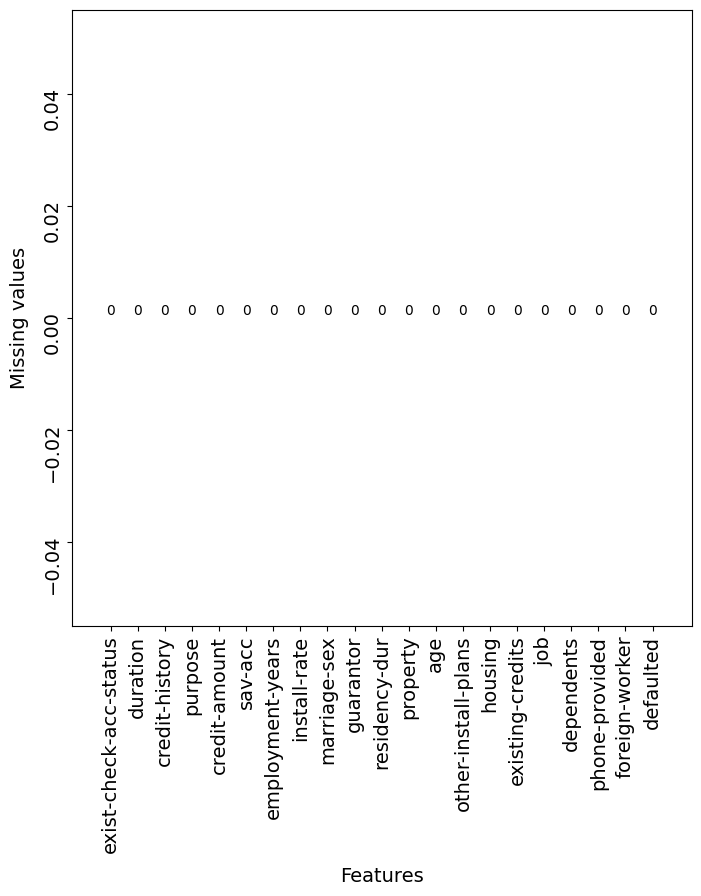

In [19]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(8,8),
                   rotated_ticks=True, save_path=ger_prep_ds_path + 'missing-values-2.pdf')

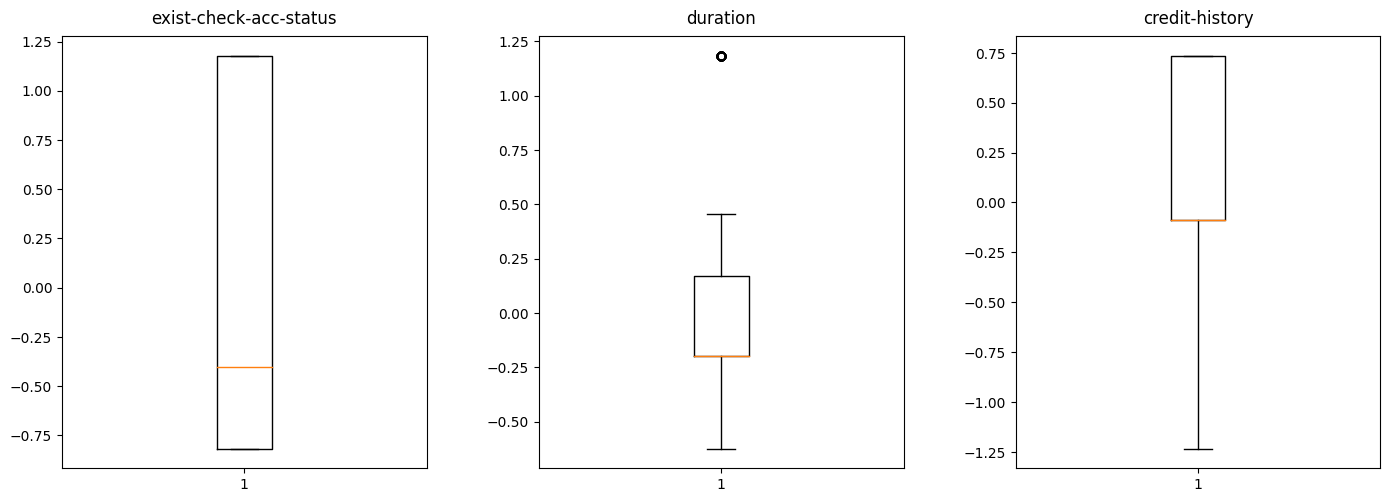

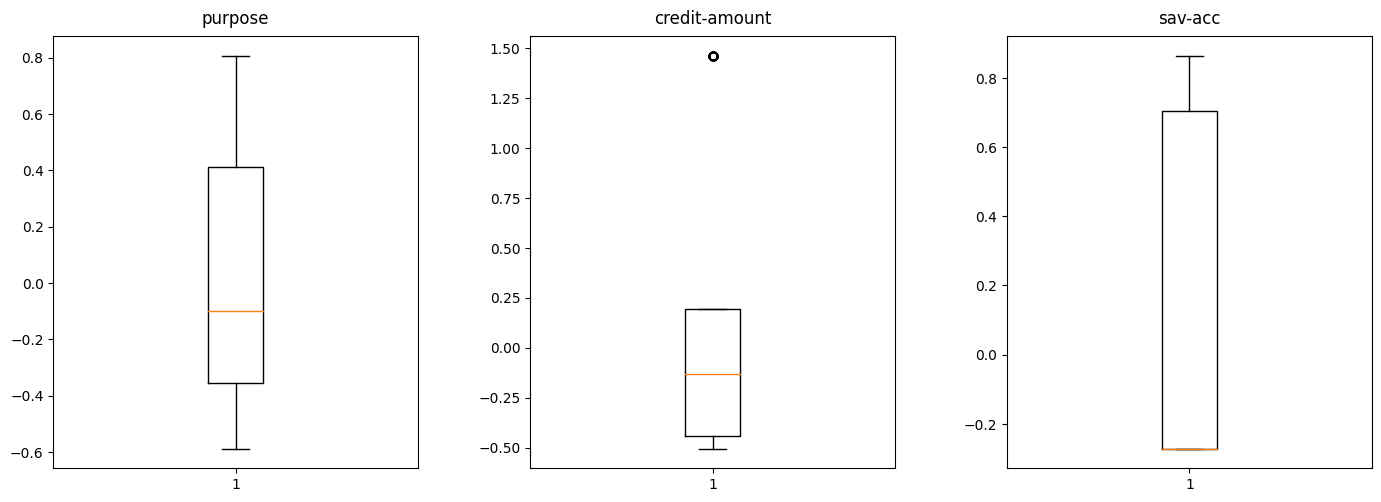

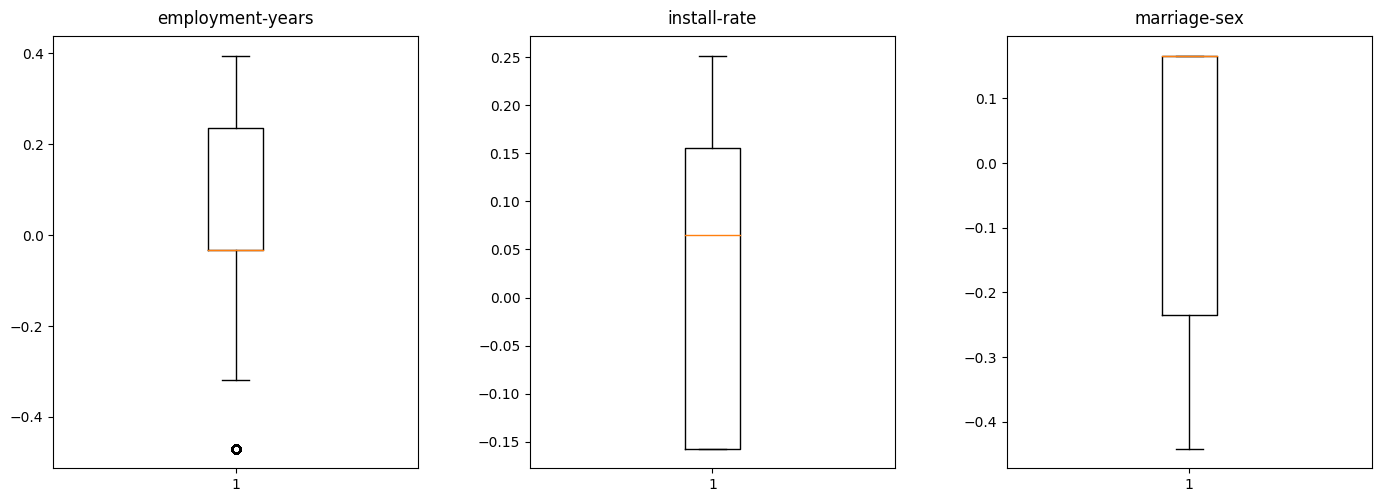

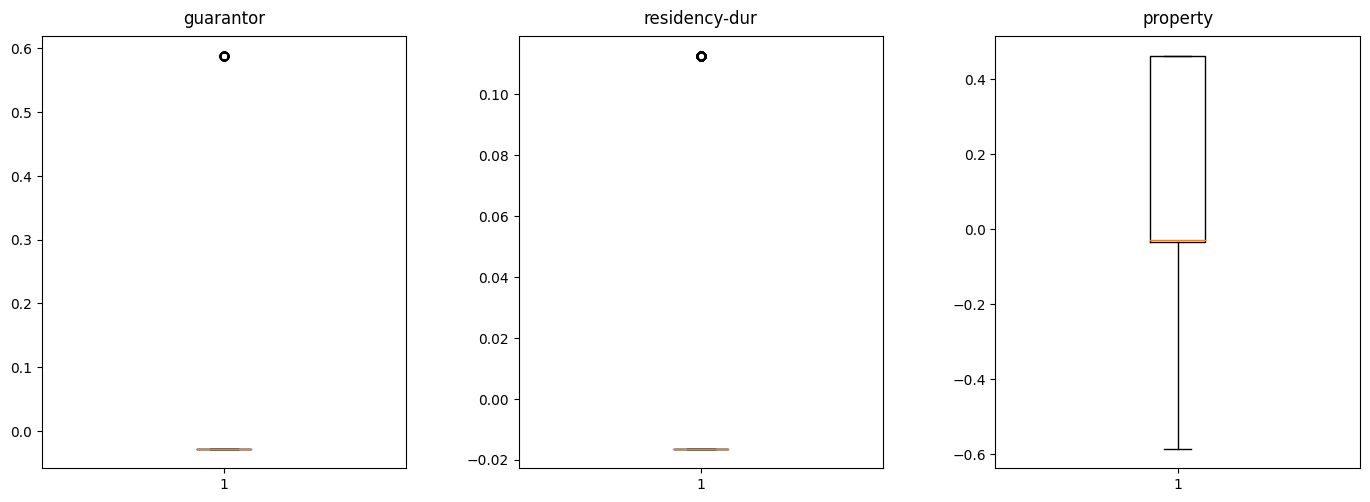

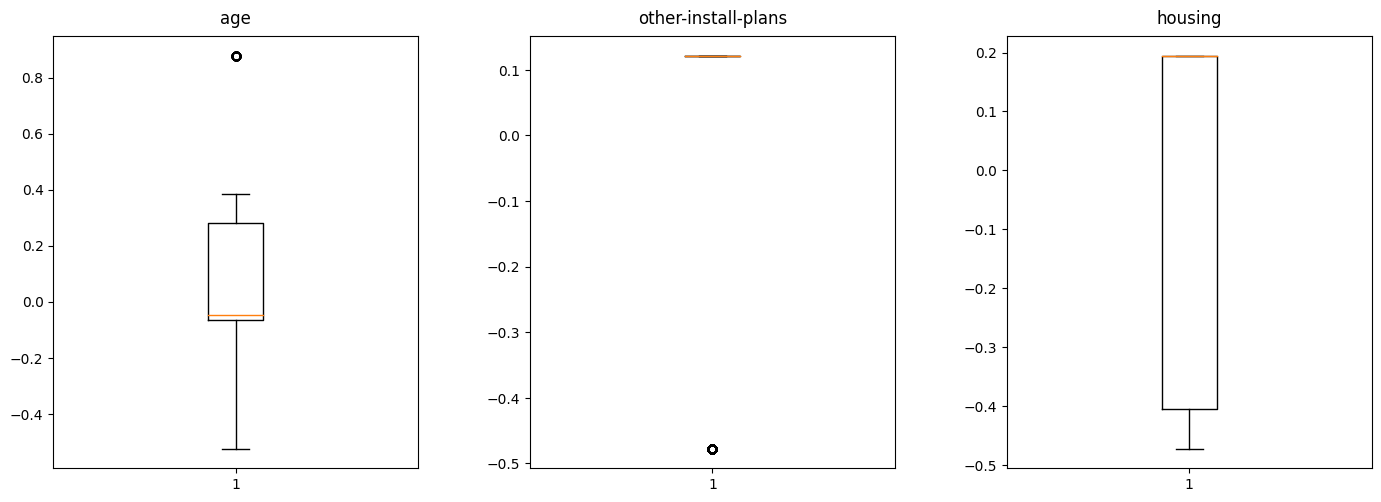

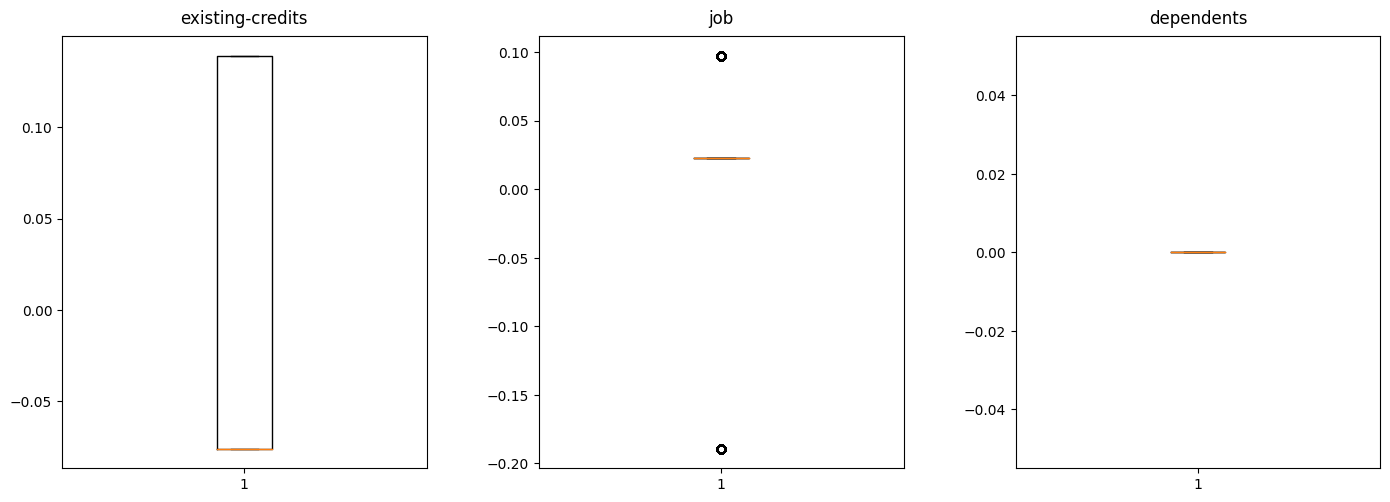

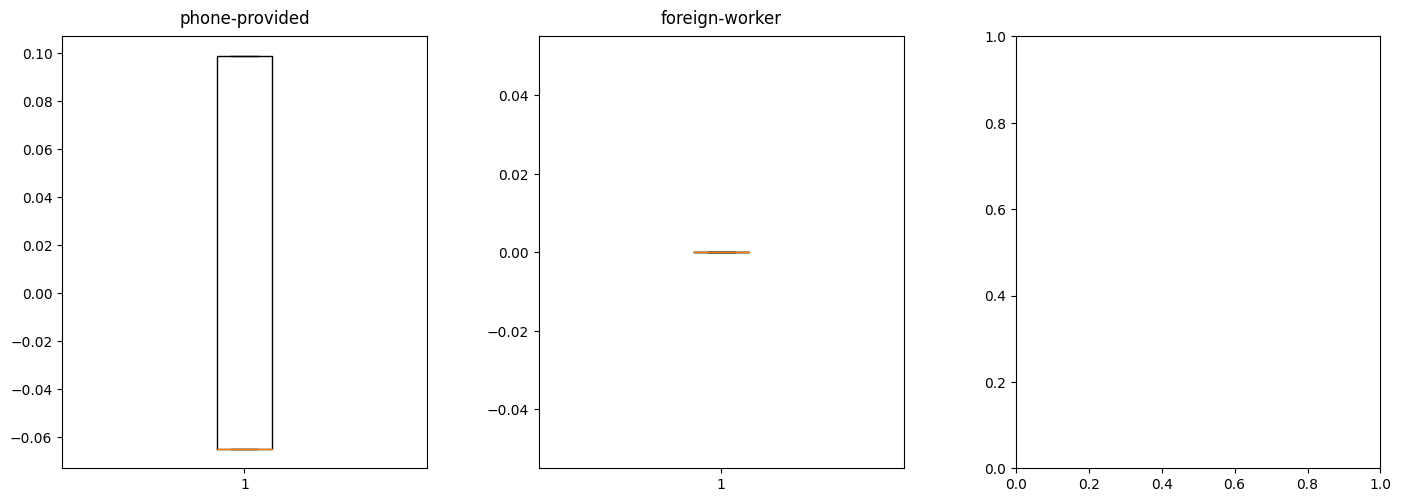

In [20]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=ger_prep_ds_path)

#### Plot samples count before and after Data cleaning.

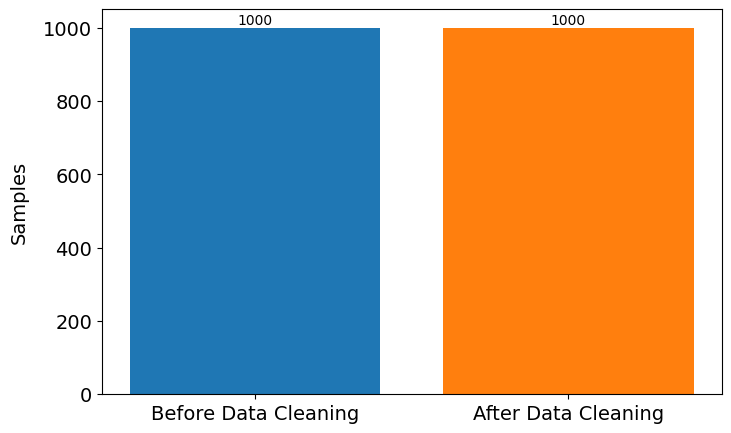

In [21]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=ger_prep_ds_path + 'before-after.pdf')

#### Features IV scores

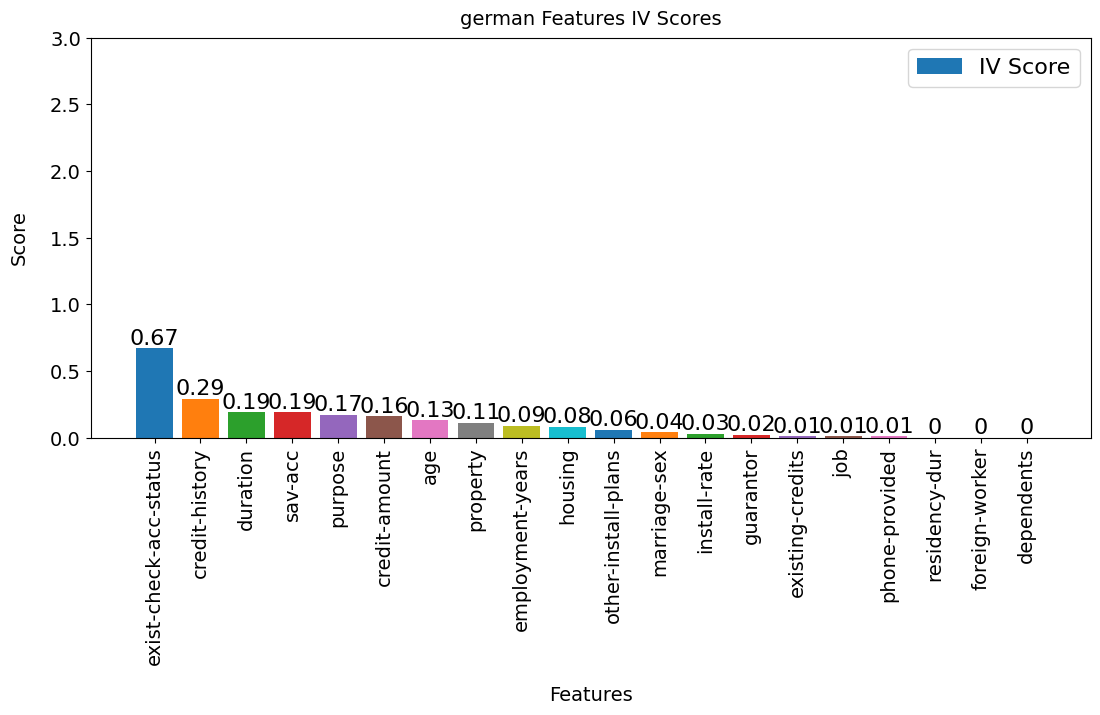

In [22]:
plotting.plot_features_scores(list(features_scores.keys()), list(features_scores.values()), 'GER Features IV Scores')

#### Features correlation

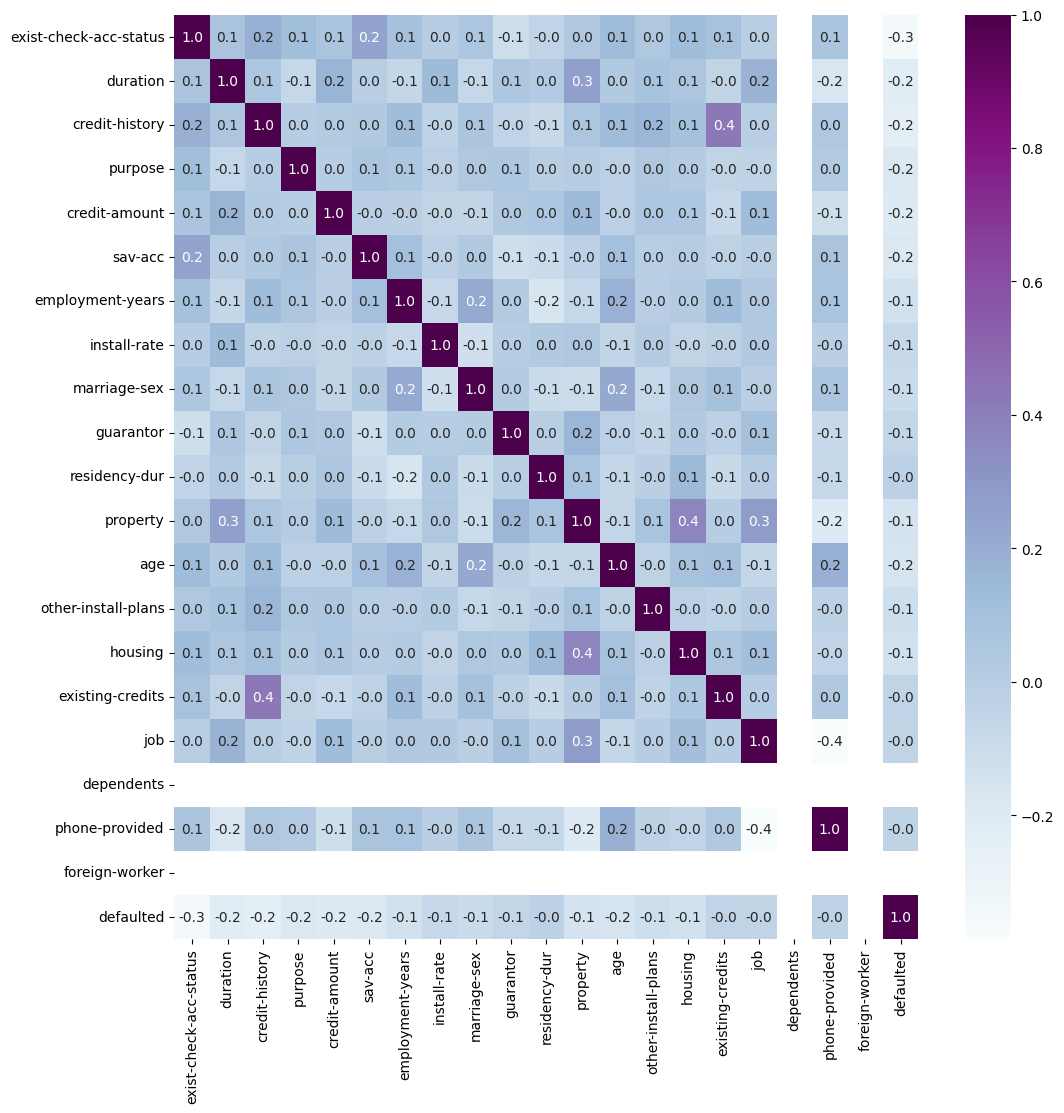

In [23]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(12, 12), save_path=ger_prep_ds_path, dpi=100)

#### Drop redundant features.

In [24]:
to_be_dropped = ['dependents', 'foreign-worker']

In [25]:
data.drop(to_be_dropped, axis=1, inplace=True)

In [26]:
for key in to_be_dropped:
    del features_scores[key]

#### Save preprocessed dataset.

In [27]:
data

,exist-check-acc-status,duration,credit-history,purpose,credit-amount,sav-acc,employment-years,install-rate,marriage-sex,guarantor,residency-dur,property,age,other-install-plans,housing,existing-credits,job,phone-provided,defaulted
0,-0.818099,1.181636,0.733741,0.410063,-0.129812,0.704246,0.235566,-0.157300,0.165548,-0.027974,-0.016367,0.461035,-0.066386,0.121179,0.194156,0.138930,0.022780,0.098638,False
1,-0.401392,-0.623823,-0.088319,0.410063,-0.440023,-0.271358,-0.032103,0.155466,-0.235341,-0.027974,-0.016367,0.461035,-0.524461,0.121179,0.194156,-0.075836,0.022780,-0.064691,True
2,1.176263,0.168017,0.733741,-0.587787,0.194992,-0.271358,0.394415,0.155466,0.165548,-0.027974,-0.016367,0.461035,0.279650,0.121179,0.194156,-0.075836,0.097164,-0.064691,False
3,-0.818099,-0.623823,-0.088319,-0.099235,-0.505406,-0.271358,0.394415,0.155466,0.165548,0.587787,-0.016367,-0.028573,0.279650,0.121179,-0.472604,-0.075836,0.022780,-0.064691,False
4,-0.818099,-0.195526,-0.085158,-0.353105,-0.440023,-0.271358,-0.032103,0.064539,0.165548,-0.027974,-0.016367,-0.586082,-0.066386,0.121179,-0.472604,0.138930,0.022780,-0.064691,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.176263,0.168017,-0.088319,-0.099235,0.194992,-0.271358,0.394415,0.064539,-0.235341,-0.027974,-0.016367,0.461035,-0.046227,0.121179,0.194156,-0.075836,0.097164,-0.064691,False
996,-0.818099,-0.278767,-0.088319,0.805625,1.459626,-0.271358,-0.032103,-0.157300,-0.441833,-0.027974,-0.016367,-0.028573,0.279650,0.121179,0.194156,-0.075836,-0.189242,0.098638,False
997,1.176263,0.168017,-0.088319,0.410063,-0.216952,-0.271358,0.235566,-0.157300,0.165548,-0.027974,-0.016367,-0.034191,0.385750,0.121179,0.194156,-0.075836,0.022780,-0.064691,False
998,-0.818099,-0.623823,-0.088319,0.410063,0.194992,-0.271358,-0.032103,-0.157300,0.165548,-0.027974,-0.016367,-0.586082,-0.524461,0.121179,-0.472604,-0.075836,0.022780,0.098638,True


In [28]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   exist-check-acc-status  1000 non-null   float64
 1   duration                1000 non-null   float64
 2   credit-history          1000 non-null   float64
 3   purpose                 1000 non-null   float64
 4   credit-amount           1000 non-null   float64
 5   sav-acc                 1000 non-null   float64
 6   employment-years        1000 non-null   float64
 7   install-rate            1000 non-null   float64
 8   marriage-sex            1000 non-null   float64
 9   guarantor               1000 non-null   float64
 10  residency-dur           1000 non-null   float64
 11  property                1000 non-null   float64
 12  age                     1000 non-null   float64
 13  other-install-plans     1000 non-null   float64
 14  housing                 1000 non-null   f

**EMP-$p_1$:**

In [29]:
len(data[data['defaulted'] == True])/len(data)

0.3

**EMP-$p_0$:**

In [30]:
len(data[data['defaulted'] == False])/len(data)

0.7

In [31]:
utilities.save_dataset(data=data,
                       features_scores=features_scores,
                       test_size=0.2,
                       save_path=ger_prep_ds_path)

Train split size: 800
Test split size: 200
